# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
from tensorflow import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
EPOCHS = 50
BATCH_SIZE = 3072 # 256
MOMENTUM = 0.95

OPTIMIZERS = {
    'SGD lr=0.1': keras.optimizers.SGD(1e-1, momentum=MOMENTUM),
    'SGD lr=0.001': keras.optimizers.SGD(1e-3, momentum=MOMENTUM),
    'RMSprop lr=0.1': keras.optimizers.RMSprop(1e-1, momentum=MOMENTUM),
    'RMSprop lr=0.001': keras.optimizers.RMSprop(1e-3, momentum=MOMENTUM),
    'Adagrad lr=0.1': keras.optimizers.Adagrad(1e-1),
    'Adagrad lr=0.001': keras.optimizers.Adagrad(1e-3),
    'Adam lr=0.1': keras.optimizers.Adam(1e-1),
    'Adam lr=0.001': keras.optimizers.Adam(1e-3),
}

In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for key in OPTIMIZERS.keys():
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with %s" % (key))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = OPTIMIZERS[key]
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-%s" % str(key)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with SGD lr=0.1


W0715 22:43:06.607639  1076 deprecation.py:323] From C:\Users\qwerz\Miniconda3\envs\ML100\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 10)                330       
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 48us/sampl

50000/50000 [==============================] - 2s 37us/sample - loss: 1.4533 - accuracy: 0.4817 - val_loss: 1.5508 - val_accuracy: 0.4512
Epoch 49/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.4241 - accuracy: 0.4903 - val_loss: 1.5085 - val_accuracy: 0.4634
Epoch 50/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.3992 - accuracy: 0.4989 - val_loss: 1.4637 - val_accuracy: 0.4846
Experiment with SGD lr=0.001
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
________________________________________________________

50000/50000 [==============================] - 2s 38us/sample - loss: 1.7386 - accuracy: 0.3823 - val_loss: 1.7377 - val_accuracy: 0.3816
Epoch 46/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7323 - accuracy: 0.3838 - val_loss: 1.7328 - val_accuracy: 0.3831
Epoch 47/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7271 - accuracy: 0.3852 - val_loss: 1.7297 - val_accuracy: 0.3834
Epoch 48/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7226 - accuracy: 0.3873 - val_loss: 1.7237 - val_accuracy: 0.3854
Epoch 49/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7183 - accuracy: 0.3895 - val_loss: 1.7207 - val_accuracy: 0.3884
Epoch 50/50
50000/50000 [==============================] - 2s 39us/sample - loss: 1.7148 - accuracy: 0.3903 - val_loss: 1.7162 - val_accuracy: 0.3896
Experiment with RMSprop lr=0.1
Model: "model"
_________________________________________________________________


Epoch 42/50
50000/50000 [==============================] - 2s 38us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 2s 38us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 2s 37us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 2s 37us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 46/50
50000/50000 [==============================] - 2s 37us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 47/50
50000/50000 [==============================] - 2s 38us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 48/50
50000/50000 [==============================] - 2s 38us/sample - loss: 14.506

50000/50000 [==============================] - 2s 37us/sample - loss: 2.3027 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 40/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3028 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 41/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 42/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 43/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3028 - accuracy: 0.0997 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 44/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 45/50
50000/50000 [==============================] - 2s 37us/sample - loss: 2.3027 - accuracy: 0.0992 - va

50000/50000 [==============================] - 2s 37us/sample - loss: 1.8233 - accuracy: 0.3395 - val_loss: 1.8416 - val_accuracy: 0.3479
Epoch 37/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.8090 - accuracy: 0.3486 - val_loss: 1.7957 - val_accuracy: 0.3606
Epoch 38/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7978 - accuracy: 0.3518 - val_loss: 1.7989 - val_accuracy: 0.3498
Epoch 39/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.8086 - accuracy: 0.3485 - val_loss: 1.8414 - val_accuracy: 0.3342
Epoch 40/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7860 - accuracy: 0.3563 - val_loss: 1.7758 - val_accuracy: 0.3468
Epoch 41/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7956 - accuracy: 0.3505 - val_loss: 1.7530 - val_accuracy: 0.3645
Epoch 42/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.7909 - accuracy: 0.3543 - va

50000/50000 [==============================] - 2s 39us/sample - loss: 2.0322 - accuracy: 0.2717 - val_loss: 2.0305 - val_accuracy: 0.2720
Epoch 34/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.0253 - accuracy: 0.2741 - val_loss: 2.0238 - val_accuracy: 0.2777
Epoch 35/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.0185 - accuracy: 0.2772 - val_loss: 2.0172 - val_accuracy: 0.2799
Epoch 36/50
50000/50000 [==============================] - 2s 39us/sample - loss: 2.0121 - accuracy: 0.2800 - val_loss: 2.0109 - val_accuracy: 0.2836
Epoch 37/50
50000/50000 [==============================] - 2s 38us/sample - loss: 2.0057 - accuracy: 0.2828 - val_loss: 2.0046 - val_accuracy: 0.2875
Epoch 38/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.9997 - accuracy: 0.2847 - val_loss: 1.9989 - val_accuracy: 0.2892
Epoch 39/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.9937 - accuracy: 0.2874 - va

50000/50000 [==============================] - 2s 38us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 2s 37us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 2s 36us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 2s 37us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 2s 38us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 2s 37us/sample - loss: 14.5063 - accuracy: 0.1000 - val_loss: 14.5063 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 2s 36us/sample - loss: 14.5063 - accuracy

50000/50000 [==============================] - 2s 37us/sample - loss: 1.5304 - accuracy: 0.4590 - val_loss: 1.5533 - val_accuracy: 0.4510
Epoch 28/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.5252 - accuracy: 0.4606 - val_loss: 1.5482 - val_accuracy: 0.4536
Epoch 29/50
50000/50000 [==============================] - 2s 36us/sample - loss: 1.5109 - accuracy: 0.4672 - val_loss: 1.5324 - val_accuracy: 0.4601
Epoch 30/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.4992 - accuracy: 0.4719 - val_loss: 1.5445 - val_accuracy: 0.4598
Epoch 31/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.5069 - accuracy: 0.4673 - val_loss: 1.5481 - val_accuracy: 0.4557
Epoch 32/50
50000/50000 [==============================] - 2s 38us/sample - loss: 1.4951 - accuracy: 0.4717 - val_loss: 1.5432 - val_accuracy: 0.4510
Epoch 33/50
50000/50000 [==============================] - 2s 37us/sample - loss: 1.4912 - accuracy: 0.4731 - va

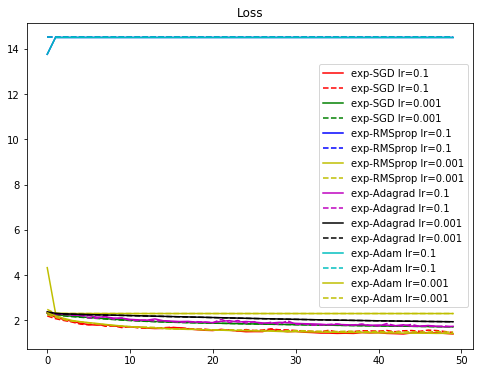

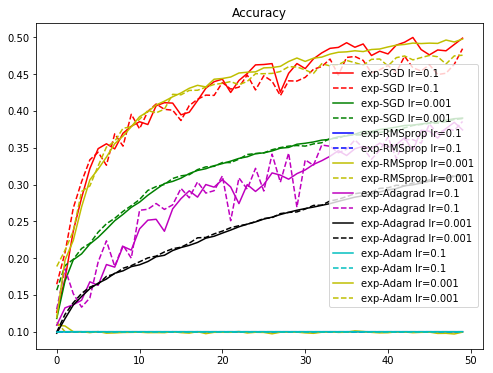

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k", "c", "y"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()